# pi.01 Gru case

In [1]:
import numpy as np
import simbinary as sim
import matplotlib.pyplot as plt
from astropy.time import Time
import pandas as pd
import numpy as np

# if you want to save data/plots please change this to your directories
plot_dir = '/Users/esivkova/phd/code/gaia_sim/plots/' # optional
data_dir = '/Users/esivkova/phd/code/gaia_sim/simDR4/' # optional
fit_dir = '/Users/esivkova/phd/code/gaia_sim/notebook_fit/' # optional

In [29]:
params = {'Object': 'pi.01 Gru', #simbad resolved name
# 'id3': str(6518817665843312000), # optional
 'type': 'cepheid', # can be 'binary' or 'BH'
 'P': 4295,
 'a': 42,
 'e': 0.1,
 'i': 11,
 'Omega': 101,
 'w': 0,
 'T0': 2453316.75,
 'q': 1.05,
 'pll': 6.1858,
 'pmra': 45.203, #31.106, # optional*
 'pmdec': -18.76, #-10.338, # optional*
 'Ppuls': 195,
 'T0puls': 2445000.55,
 'Vmax': 5.5,
 'Vmin': 7.5,
 'Vcomp': 11,
 'Vmain': 6.55 # optional
}

In [30]:
sb = sim.SimBinary(params, DataRelease = 4, GaiaPuls = False) # DataRelease from 1 to 5

w_bs = sb.SimDR4() # simulated along scan points
sim_astrometry = sb.get_dataframe(data_dir) # a dataframe

Gaia DR3 ID added with Simbad
RA/DEC coordinates added with Gaia DR3


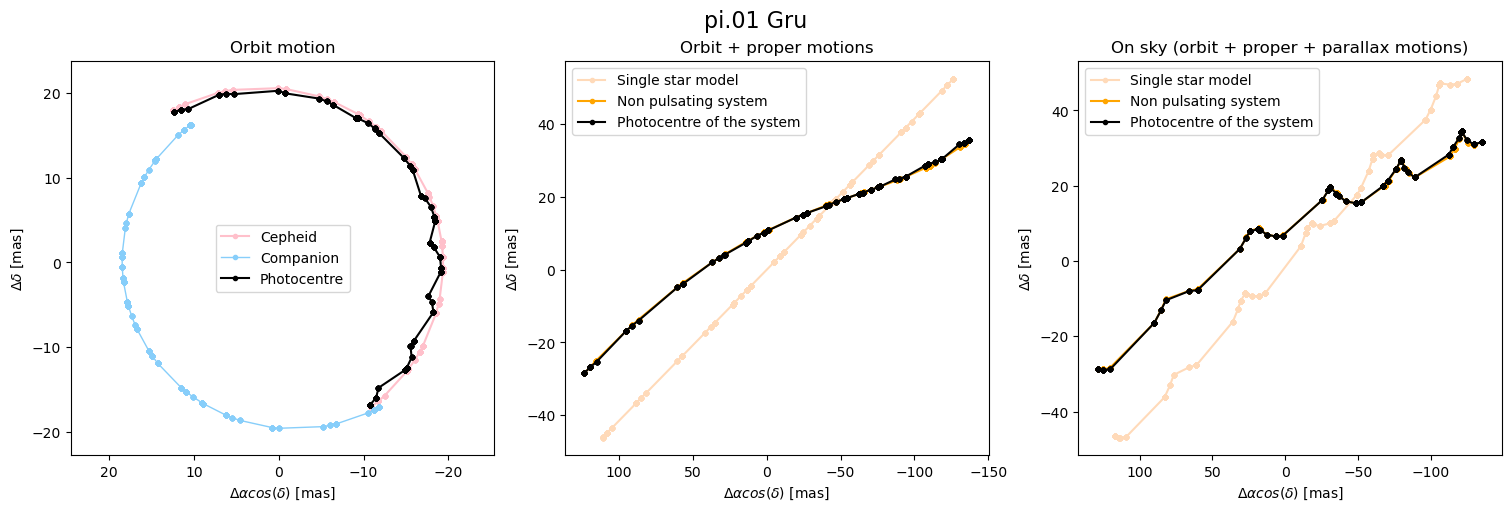

In [31]:
sb.PlotSim(plot_dir) # plot. plot_dir is optional

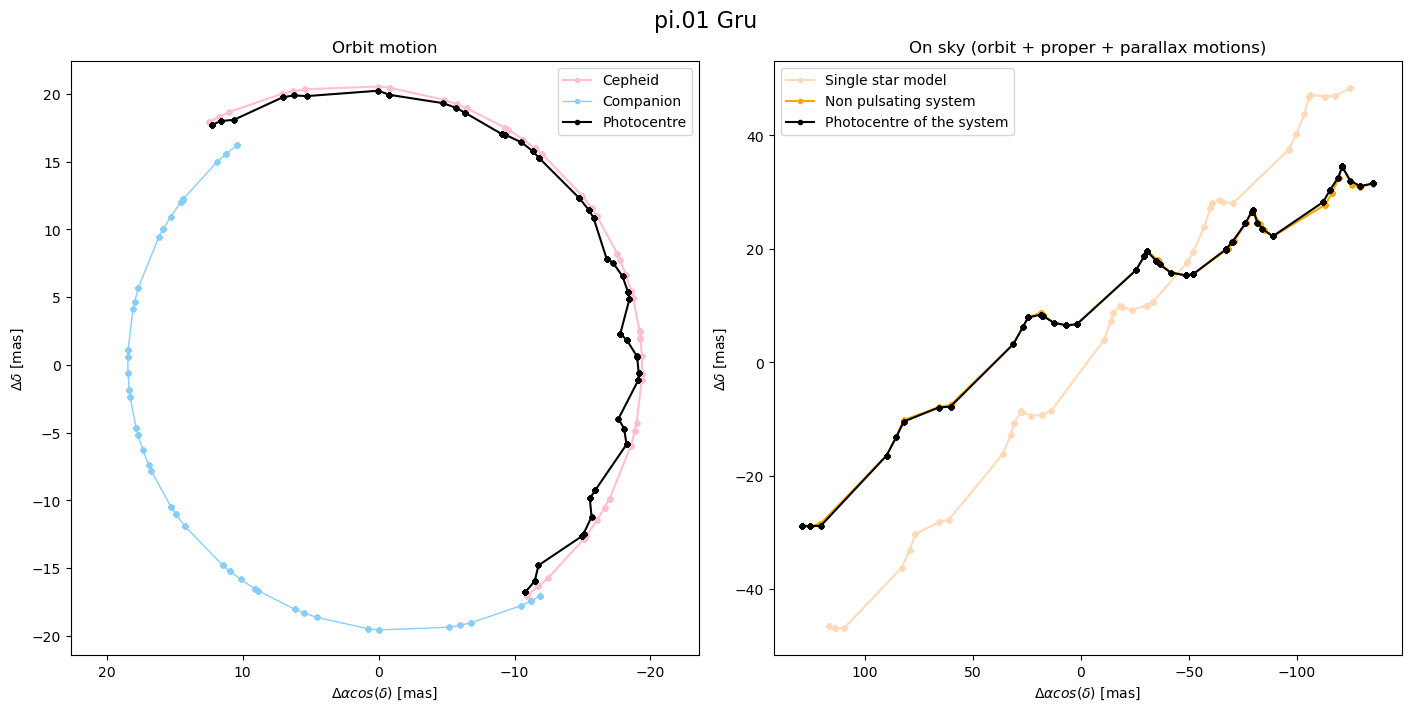

In [32]:
sb.PlotSim2(plot_dir) # same plot but without the intermediate step

In [33]:
nt = sim.notebookDR4(params['Object'], sb.id3) # initialize fitting
nt.load_dataframe(sim_astrometry) # give data to fit
fit_parameters = nt.fitthething(fit_dir) # fit. fit_dir is optional

SS model
Parameter                        Value     Error       
lin.ra                        -8.61872  ±  0.00122     
lin.dec                        9.93653  ±  0.00102     
lin.parallax                   5.04683  ±  0.00147     
lin.mura                     48.334461  ±  0.000674    
lin.mudec                   -10.806424  ±  0.000760    
BS model
Parameter                        Value     Error       
lin.ra                         -1.2067  ±  0.0445      
lin.dec                         1.7279  ±  0.0482      
lin.parallax                   6.18346  ±  0.00156     
lin.mura                       46.0664  ±  0.0348      
lin.mudec                     -17.7263  ±  0.0508      
kep.0.P                         3796.4  ±  24.8        
kep.0.Tp                        -392.2  ±  15.5        
kep.0.as                        18.104  ±  0.124       
kep.0.e                        0.06225  ±  0.00272     
kep.0.w [deg]                   153.60  ±  2.05        
kep.0.i [deg]                 

Text(0, 0.5, 'Along scan, [mas]')

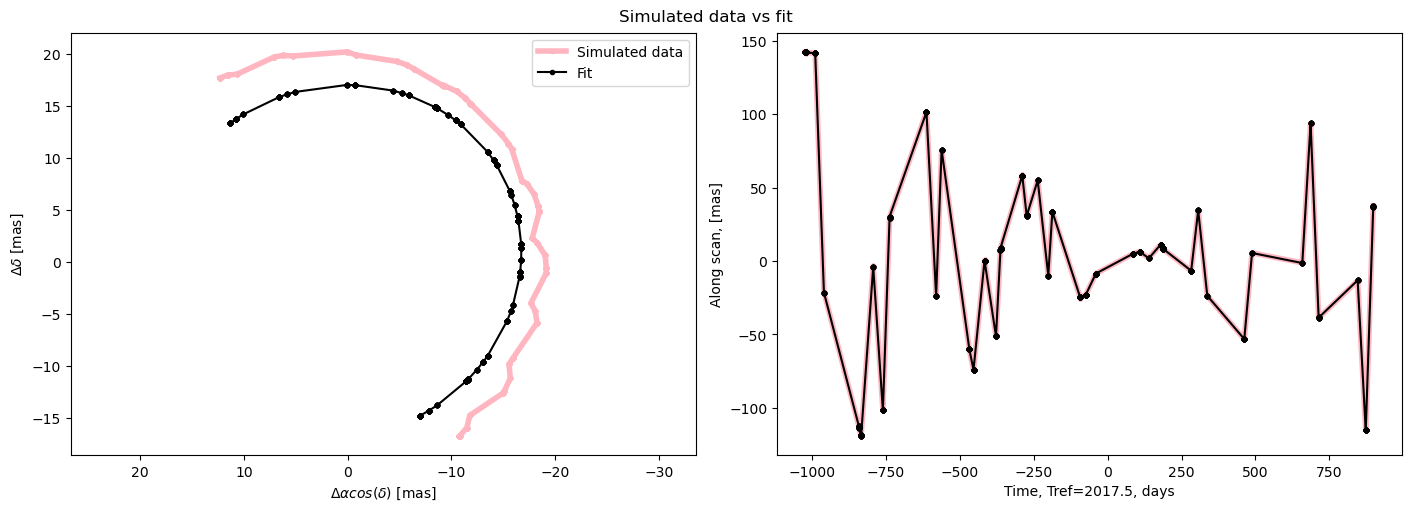

In [34]:
w_fit = nt.keplerian_model.model() # fitted along scan
ra_fit, dec_fit = sim.orbit2(fit_parameters, sb.reltimes.value) # fitted
ra_ph, dec_ph = sb.ra_ph, sb.dec_ph # sim data

fig, axs = plt.subplots(1,2, figsize=(14, 5), constrained_layout=True)
ax1, ax2 = axs
fig.suptitle('Simulated data vs fit')
ax1.plot(ra_ph, dec_ph, label = 'Simulated data', marker='.', lw = 4, color='lightpink')
ax1.plot(ra_fit, dec_fit, label = 'Fit', marker='.', color = 'black')
ax1.set_aspect('equal', adjustable='datalim')
ax1.xaxis.set_inverted(True)
ax1.set_xlabel(r'$\Delta \alpha cos(\delta)$ [mas]')
ax1.set_ylabel(r'$\Delta \delta$ [mas]')
ax1.legend()

ax2.plot(sb.reltimes.value, w_bs, marker='.', lw = 4, color='lightpink')
ax2.plot(sb.reltimes.value, w_fit, marker='.', color = 'black')
ax2.set_xlabel(f'Time, Tref={sb.Tref}, days')
ax2.set_ylabel('Along scan, [mas]')